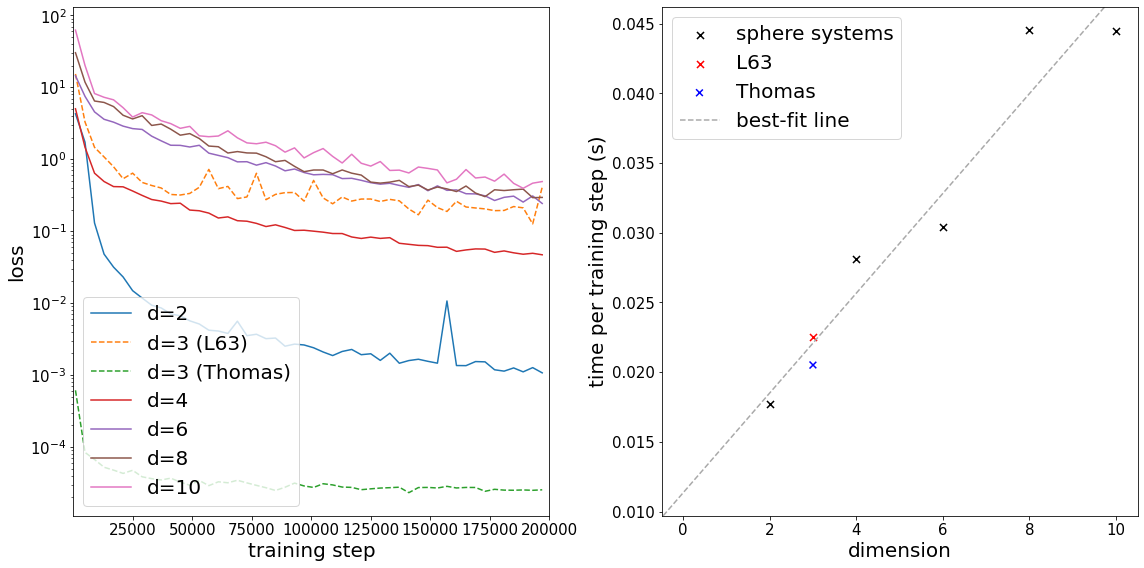

In [29]:
import numpy as np 
import matplotlib.pyplot as plt  


# set up plotting parameters
scale = 5
xlabel_size = ylabel_size = 15 + scale
tick_size = 10 + scale
legend_size = 15 + scale
title_size = 15 + scale
cbar_tick_size = 10 + scale

files = ['../../data/{}D/train_log.csv'.format(2)]
files.append('../../../non-grad3D/data/L63/train_log.csv')
files.append('../../../non-grad3D/data/Thomas/400k/train_log.csv')
files += ['../../data/{}D/train_log.csv'.format(i) for i in [4, 6, 8, 10]]



fig = plt.figure(figsize=(16, 8))


ax = fig.add_subplot(121)
labels = ['d=2'] + ['d=3 (L63)', 'd=3 (Thomas)'] + ['d={}'.format(i) for i in [4, 6, 8, 10]]
linestyles = ['solid'] + ['dashed']*2 + ['solid' for i in [4, 6, 8, 10]] 


for i, file in enumerate(files):
    data = np.genfromtxt(file, delimiter=',')
    ax.semilogy(data[100:20000:400, 0], data[100:20000:400, 1], label=labels[i], linestyle=linestyles[i])
r = range(100, 200000, 1)
# ax.plot(r, [0.1]*len(r), c='black', linestyle='dashed')

ax.set_xlabel('training step', fontsize=xlabel_size)
ax.set_ylabel('loss', fontsize=ylabel_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.tick_params(axis='both', which='minor', labelsize=tick_size)
ax.set_xlim((100, 200000))
ax.legend(fontsize=legend_size)

ts = []
ax1 = fig.add_subplot(122)
for i, file in enumerate(files):
    data = np.genfromtxt(file, delimiter=',')
    ts.append(data[-1, 2] / data[-1, 0])

m, b = np.polyfit([2, 3, 3, 4, 6, 8, 10,], ts, deg=1)


ax1.scatter([2, 4, 6, 8, 10], ts[0:1] + ts[3:], s=50, marker='x', c='black', label="sphere systems")
ax1.scatter([3], [ts[1]], s=50, marker='x', c='red', label="L63")
ax1.scatter([3], [ts[2]], s=50, marker='x', c='blue', label="Thomas", linestyle="dashdot")
ax1.axline(xy1=(0, b), slope=m, label='best-fit line', c='darkgrey', linestyle="dashed")

ax1.set_xlabel('dimension', fontsize=xlabel_size)
ax1.set_ylabel('time per training step (s)', fontsize=ylabel_size)
ax1.tick_params(axis='both', which='major', labelsize=tick_size)
ax1.tick_params(axis='both', which='minor', labelsize=tick_size)
ax1.legend(fontsize=legend_size)
fig.subplots_adjust(wspace=0.5, hspace=0.4)
plt.tight_layout()
plt.savefig('../../plots/time_vs_loss.png')